In [69]:
from UCIDataset import UCIDataset
from EvolutionaryWrapperFeatureSelection import EvolutionaryWrapperFeatureSelection
from SurrogateAssistedWrapperFeatureSelection import SurrogateAssistedWrapperFeatureSelection
from sklearn.datasets import make_classification
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Synthetic Data
Feature selection is done for synthetic data of which the informative features are known. In the below example a dataset of 1000 instances are created of which only the first two features (indexes [0,1]) are informative and the rest are random noise. Three wrapper feature selection methods are used to identify the infromative features:
<ul>
<li>CHC</li>
<li>GA</li>
<li>SAGA</li>
</ul>

In [75]:
def createDataset(n_samples, n_features, n_classes, n_informative, classifier):
    X, y = make_classification(n_samples=n_samples, n_features=n_features, n_classes=n_classes,
                               n_informative=n_informative, n_redundant=0, n_repeated=0,
                               random_state=1, shuffle=False)

    df = pd.DataFrame(X)
    df['labels'] = pd.Series(y)
    label = -1
    header = None

    dataset = UCIDataset(df, 'df', label, divide_dataset=False, header=header)
    dataset.divideDataset(classifier,
                          normalize=True, 
                          shuffle=True, 
                          all_features=True, 
                          all_instances=True, 
                          evaluate=True, 
                          partial_sample=False)
    return dataset

In [78]:
dataset = createDataset(1000, 200, 2, 2, DecisionTreeClassifier(random_state=0))

In [80]:
log, population = EvolutionaryWrapperFeatureSelection.CHC(dataset, 
                                                          populationSize=40, 
                                                          d=False, 
                                                          divergence=0.35, 
                                                          evaluation='validation',
                                                          timeout=10)


In [81]:
log, population = EvolutionaryWrapperFeatureSelection.GA(dataset, 
                                                         populationSize=40, 
                                                         crossOverP=0.9, 
                                                         mutationP=0.1,
                                                         evaluation='validation',
                                                         timeout=10)


In [82]:
log, population = SurrogateAssistedWrapperFeatureSelection.SAGA(dataset, 
                                                                populationSize=40, 
                                                                a=16, 
                                                                reductionRate=0.5, 
                                                                step=10, 
                                                                verbose=0,
                                                                evaluation='validation',
                                                                timeout=10)



In [83]:
log

,generation,time,best_fitness,average_fitness,number_of_evaluations,best_solution,best_fitness_original
0,10,0.703763,-213.24,NA,1,"[0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, ...",-216.32
1,20,1.026902,-176.24,NA,2,"[0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, ...",-177.12
0,21,3.592032,-146.72,-1.95901,79,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",-146.72
1,22,4.184452,-112.90,-1.64373,113,"[0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...",-112.90
2,23,4.768898,-100.40,-1.40789,147,"[1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, ...",-100.40
...,...,...,...,...,...,...,...
100,121,9.862682,38.24,0.14005,435,"[1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, ...",38.24
101,122,9.905568,43.44,0.167235,439,"[1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, ...",43.44
102,123,9.967127,43.44,0.18099,445,"[1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, ...",43.44
103,124,9.987052,43.44,0.18099,445,"[1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, ...",43.44


In [48]:
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt

comparision_df = pd.DataFrame(columns=('experiment', 'algorithm', 'training', 'testing', 'total_time', 'reduction'))

[0, 'CHC', 76.67, 78.33, 5.00394606590271, 84.5], Gen =  3 , Gen =  4 5  68 
[0, 'GA', 73.33, 75.0, 5.149216413497925, 73.0]n =  16  19 
[0, 'SAGA', 75.0, 93.33, 5.0018675327301025, 89.5]  6 


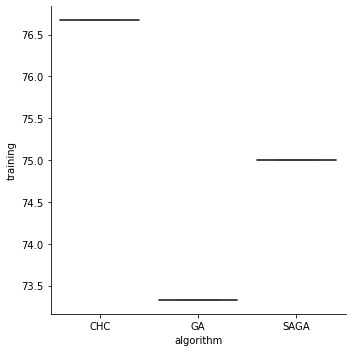

[1, 'CHC', 75.0, 80.0, 5.0218939781188965, 82.0]
[1, 'GA', 71.67, 83.33, 5.053395986557007, 68.0]
[1, 'SAGA', 75.0, 81.67, 5.001658916473389, 94.5]


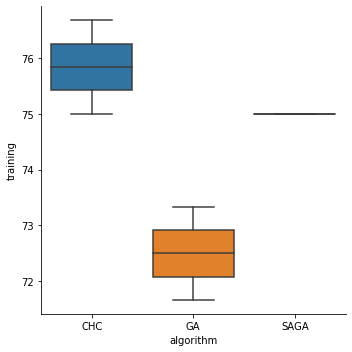

[2, 'CHC', 71.67, 91.67, 5.011698246002197, 79.0] Gen =  3 
[2, 'GA', 73.33, 78.33, 5.095264673233032, 73.5]
[2, 'SAGA', 75.0, 81.67, 5.0048511028289795, 93.0]en =  62 


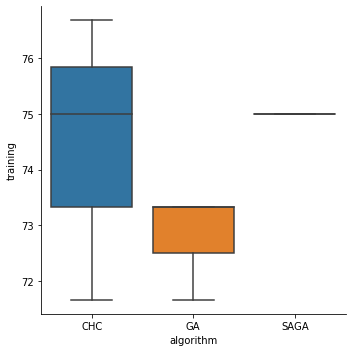

[3, 'CHC', 71.67, 76.67, 5.010681629180908, 82.5]
[3, 'GA', 76.67, 85.0, 5.017403602600098, 70.5]
[3, 'SAGA', 76.67, 83.33, 5.015042304992676, 90.5] , Gen =  1   


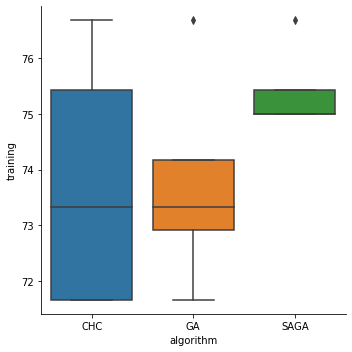

[4, 'CHC', 73.33, 81.67, 5.0066094398498535, 83.0] -139.39 , Gen =  18 , Gen =  38 
[4, 'GA', 73.33, 71.67, 5.169180154800415, 72.0]
[4, 'SAGA', 71.67, 85.0, 5.014587163925171, 93.5]6 82  107 


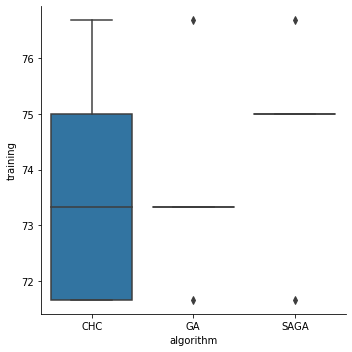

[5, 'CHC', 78.33, 83.33, 5.0079309940338135, 81.5]3  -78.69 , Gen =  75 
[5, 'GA', 80.0, 73.33, 5.072434902191162, 70.5] 7 
[5, 'SAGA', 71.67, 85.0, 5.004593133926392, 95.5]  , Gen =  86 


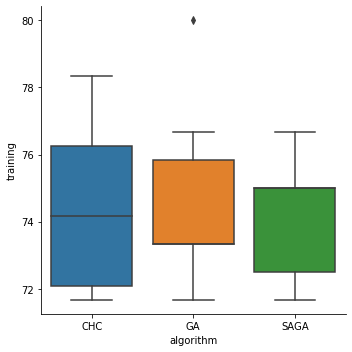

[6, 'CHC', 70.0, 81.67, 5.028359651565552, 80.0] 10  
[6, 'GA', 78.33, 73.33, 5.060471296310425, 65.5]
[6, 'SAGA', 71.67, 88.33, 5.003003358840942, 89.0]Gen =  52 


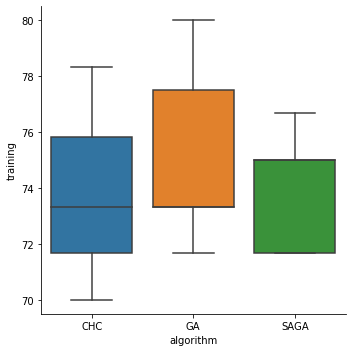

[7, 'CHC', 76.67, 73.33, 5.003873825073242, 77.5] 18  -129.61 , Gen =  45 
[7, 'GA', 76.67, 80.0, 5.02318811416626, 71.5]
[7, 'SAGA', 76.67, 68.33, 5.002348899841309, 91.0]33   23.39 , Gen =  90 


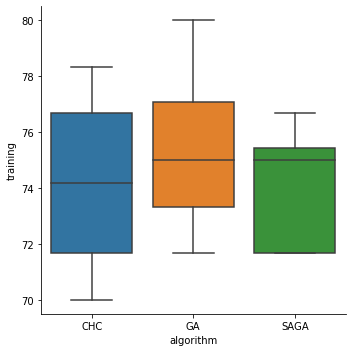

[8, 'CHC', 73.33, 86.67, 5.008641719818115, 81.5] Gen =  75  
[8, 'GA', 78.33, 81.67, 5.14931583404541, 70.0]  3  17 
[8, 'SAGA', 71.67, 73.33, 5.006745338439941, 92.5]  70 


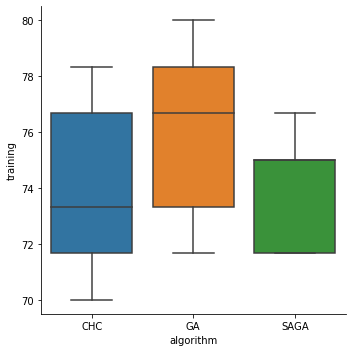

[9, 'CHC', 83.33, 76.67, 5.018542051315308, 76.0] =  75 
[9, 'GA', 75.0, 78.33, 5.047179460525513, 77.5]
[9, 'SAGA', 81.67, 88.33, 5.017951726913452, 86.5]


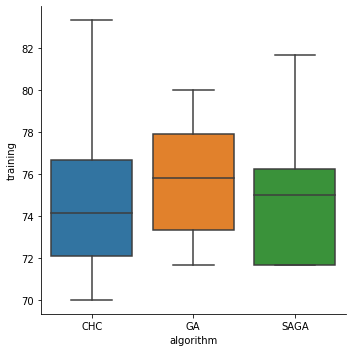

[10, 'CHC', 70.0, 75.0, 5.011423110961914, 83.0] Gen =  41 
[10, 'GA', 75.0, 80.0, 5.14083456993103, 72.0]
[10, 'SAGA', 66.67, 73.33, 5.014425039291382, 89.5]


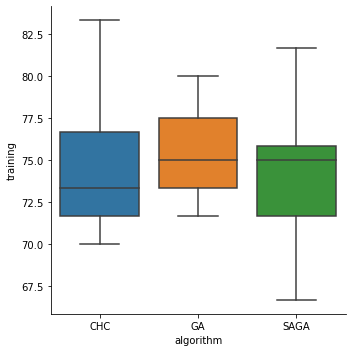

[11, 'CHC', 76.67, 80.0, 5.010564804077148, 80.5]
[11, 'GA', 78.33, 85.0, 5.101740598678589, 69.0]
[11, 'SAGA', 78.33, 81.67, 5.005575180053711, 92.5]Gen =  2 78 


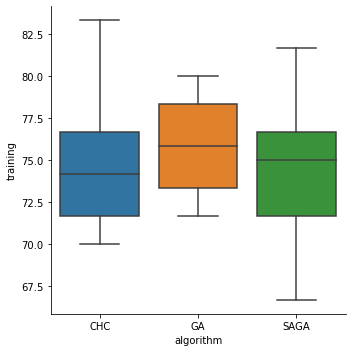

[12, 'CHC', 76.67, 81.67, 5.0253705978393555, 79.0]Gen =  17 , Gen =  32 -62.83 , Gen =  104 
[12, 'GA', 71.67, 75.0, 5.09558629989624, 69.0]
[12, 'SAGA', 78.33, 86.67, 5.035828351974487, 88.0]


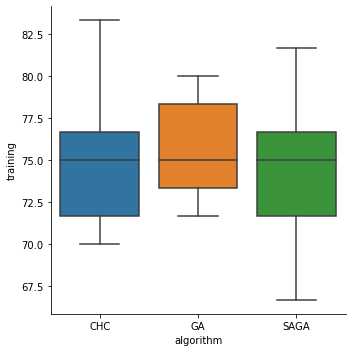

[13, 'CHC', 78.33, 91.67, 5.00892448425293, 79.5] 17  41  
[13, 'GA', 73.33, 73.33, 5.103362321853638, 70.0]
[13, 'SAGA', 73.33, 76.67, 5.007152557373047, 95.5]en =  9  , Gen =  119 


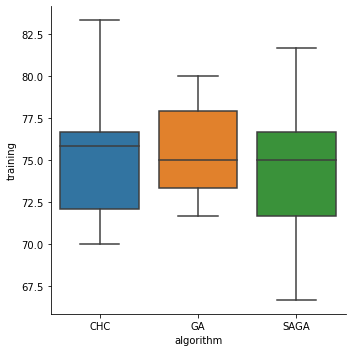

[14, 'CHC', 76.67, 83.33, 5.007614374160767, 82.0]Gen =  9 -195.64 , Gen =  19   
[14, 'GA', 83.33, 76.67, 5.089439630508423, 70.5]
[14, 'SAGA', 75.0, 86.67, 5.008316993713379, 92.5]


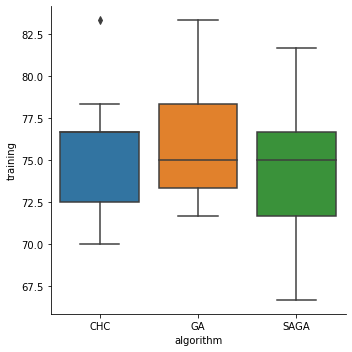

[15, 'CHC', 73.33, 75.0, 5.031762361526489, 85.5] Gen =  5  -221.83 , Gen =  6 11 
[15, 'GA', 51.67, 50.0, 5.0707995891571045, 66.5]
[15, 'SAGA', 71.67, 88.33, 5.01969575881958, 95.0] , Gen =  1  -165.43 , Gen =  1 


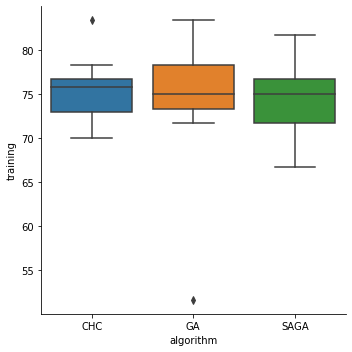

[16, 'CHC', 70.0, 83.33, 5.011477470397949, 87.0], Gen =  36 
[16, 'GA', 76.67, 78.33, 5.188010931015015, 70.5]
[16, 'SAGA', 76.67, 76.67, 5.021579742431641, 91.0] Gen =  10 


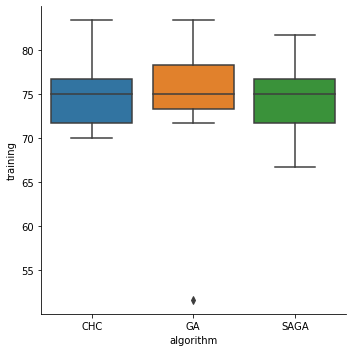

[17, 'CHC', 76.67, 76.67, 5.013382434844971, 81.5]
[17, 'GA', 78.33, 90.0, 5.167510509490967, 72.0]
[17, 'SAGA', 71.67, 68.33, 5.017733573913574, 90.0]en =  9   7  


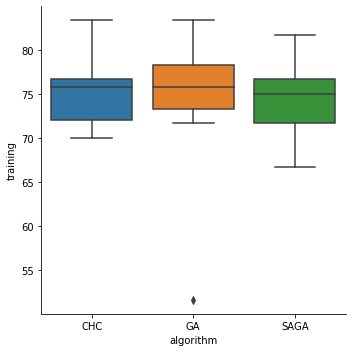

[18, 'CHC', 73.33, 78.33, 5.001713275909424, 83.5]9 -181.27 , Gen =  11 
[18, 'GA', 73.33, 85.0, 5.0203070640563965, 70.0]
[18, 'SAGA', 75.0, 65.0, 5.014486074447632, 94.0]


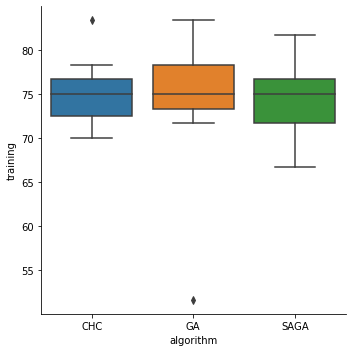

[19, 'CHC', 73.33, 75.0, 5.003912925720215, 79.5]
[19, 'GA', 75.0, 76.67, 5.1133129596710205, 72.0]
[19, 'SAGA', 71.67, 88.33, 5.025206089019775, 93.0]Gen =  5 


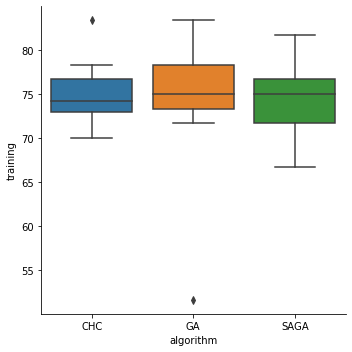

[20, 'CHC', 81.67, 88.33, 5.005424499511719, 77.0]
[20, 'GA', 83.33, 83.33, 5.119318962097168, 67.5] Gen =  4 
[20, 'SAGA', 71.67, 78.33, 5.026414394378662, 91.5] 


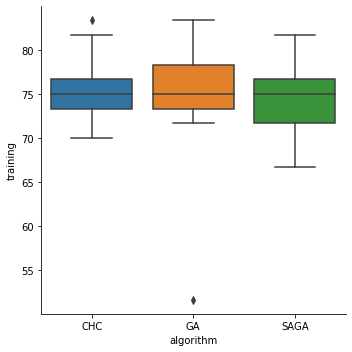

[21, 'CHC', 76.67, 76.67, 5.0093255043029785, 81.5]
[21, 'GA', 81.67, 81.67, 5.157997131347656, 70.0]
[21, 'SAGA', 71.67, 80.0, 5.020397186279297, 89.5]8.21 , Gen =  2 


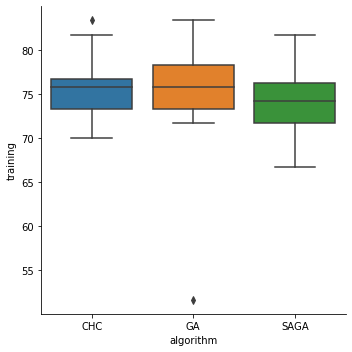

[22, 'CHC', 70.0, 70.0, 5.001234292984009, 85.0]
[22, 'GA', 78.33, 81.67, 5.12686562538147, 73.5] Gen =  5 
[22, 'SAGA', 78.33, 71.67, 5.021970510482788, 89.0]


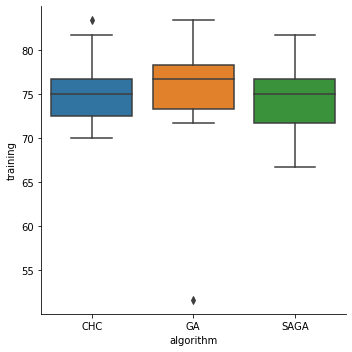

[23, 'CHC', 76.67, 73.33, 5.003310918807983, 78.0]
[23, 'GA', 70.0, 85.0, 5.140357732772827, 70.5]  9 12 
[23, 'SAGA', 76.67, 65.0, 5.006130695343018, 90.5]


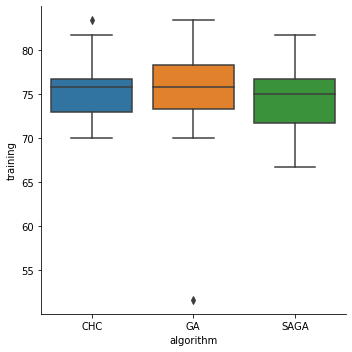

[24, 'CHC', 78.33, 73.33, 5.02202582359314, 81.0].82 , Gen =  90 
[24, 'GA', 76.67, 71.67, 5.068455219268799, 69.0]Gen =  4  , Gen =  5 
[24, 'SAGA', 76.67, 83.33, 5.032597780227661, 93.0] , Gen =  48 , Gen =  55 79 


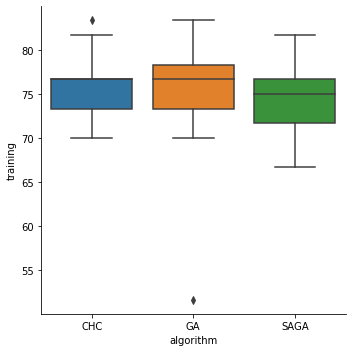

[25, 'CHC', 76.67, 93.33, 5.012048244476318, 76.0]
[25, 'GA', 73.33, 78.33, 5.035049676895142, 68.5], Gen =  19 
[25, 'SAGA', 66.67, 78.33, 5.002173185348511, 91.5]Gen =  2  -65.35 , Gen =  7  -7.63 , Gen =  33 


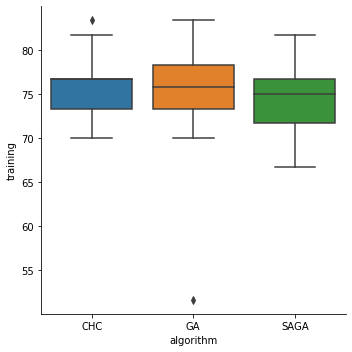

[26, 'CHC', 76.67, 68.33, 5.024518013000488, 79.0]en =  70 
[26, 'GA', 76.67, 90.0, 5.170709848403931, 66.0]
[26, 'SAGA', 81.67, 86.67, 5.045544385910034, 87.0]


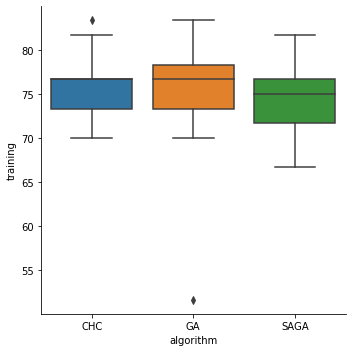

[27, 'CHC', 76.67, 81.67, 5.028521299362183, 75.5] Gen =  19 
[27, 'GA', 78.33, 83.33, 5.02057147026062, 62.0]
[27, 'SAGA', 71.67, 88.33, 5.023133754730225, 87.5]en =  7  -196.52 , Gen =  1  -174.03 , Gen =  5  -174.03 , Gen =  1  -174.03 , Gen =  9  


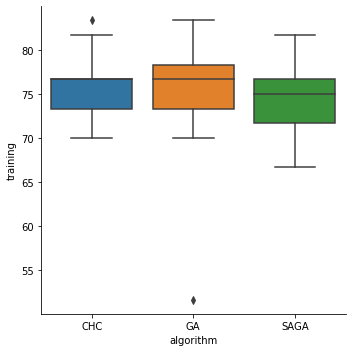

[28, 'CHC', 81.67, 80.0, 5.003411531448364, 79.5], Gen =  26 
[28, 'GA', 76.67, 80.0, 5.155268907546997, 70.0]9 , Gen =  11 
[28, 'SAGA', 71.67, 90.0, 5.036528825759888, 86.5]Gen =  5   4  -194.04 , Gen =  7  -194.04 , Gen =  1  3  -187.69 , Gen =  2  -178.27 , Gen =  9  -178.27 , Gen =  7  -181.2 , Gen =  6  -47.79 , Gen =  7 


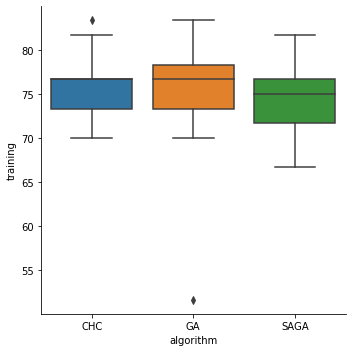

[29, 'CHC', 76.67, 78.33, 5.0348427295684814, 84.5]
[29, 'GA', 76.67, 81.67, 5.1093645095825195, 70.5]en =  8 15 
[29, 'SAGA', 73.33, 81.67, 5.011449575424194, 91.0]


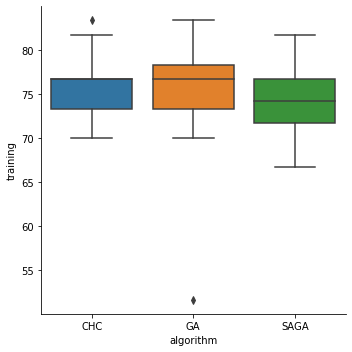

[30, 'CHC', 76.67, 75.0, 5.012633323669434, 84.0]Gen =  33 
[30, 'GA', 75.0, 78.33, 5.046748399734497, 66.5]
[30, 'SAGA', 76.67, 81.67, 5.021575212478638, 92.5]


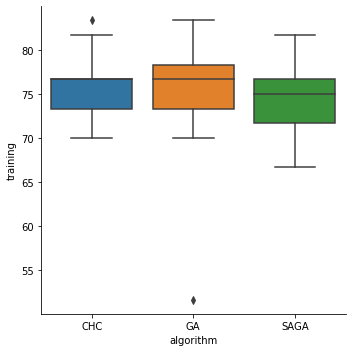

[31, 'CHC', 75.0, 81.67, 5.004864454269409, 80.0]
[31, 'GA', 76.67, 81.67, 5.121301174163818, 73.0]
[31, 'SAGA', 73.33, 71.67, 5.022935628890991, 92.5] 72 89 


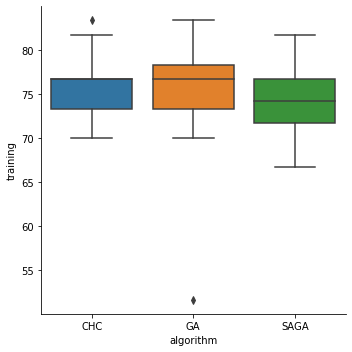

[32, 'CHC', 73.33, 85.0, 5.017150163650513, 83.0] Gen =  3 , Gen =  4  77 
[32, 'GA', 80.0, 80.0, 5.145238399505615, 70.5]
[32, 'SAGA', 75.0, 78.33, 5.003907203674316, 93.5]118 


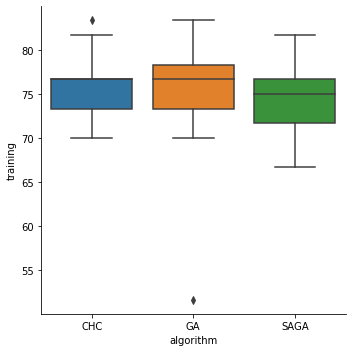

[33, 'CHC', 71.67, 75.0, 5.024143934249878, 76.5] , Gen =  43 
[33, 'GA', 76.67, 85.0, 5.105937719345093, 71.0] 6 -255.37 , Gen =  12  13 -245.71 , Gen =  14  -227.51 , Gen =  21 22 
[33, 'SAGA', 76.67, 76.67, 5.016696929931641, 94.0]45.05 , Gen =  101 


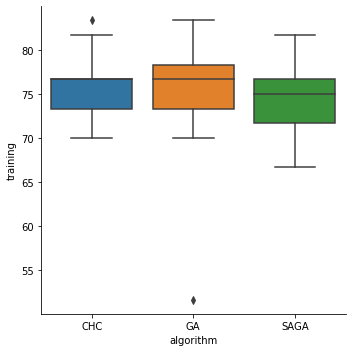

[34, 'CHC', 76.67, 80.0, 5.0161213874816895, 83.5] , Gen =  42 67 
[34, 'GA', 71.67, 85.0, 5.071917772293091, 75.0]6 , Gen =  7 
[34, 'SAGA', 75.0, 78.33, 5.0058979988098145, 88.0]  , Gen =  4 


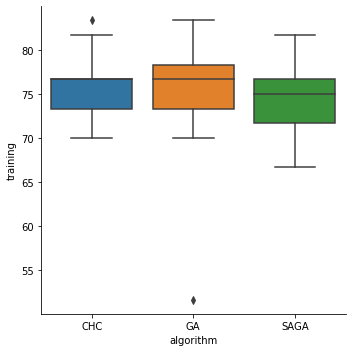

[35, 'CHC', 76.67, 73.33, 5.022814035415649, 84.0]
[35, 'GA', 70.0, 81.67, 5.108760356903076, 69.0]
[35, 'SAGA', 71.67, 78.33, 5.024391412734985, 93.5]Gen =  111 


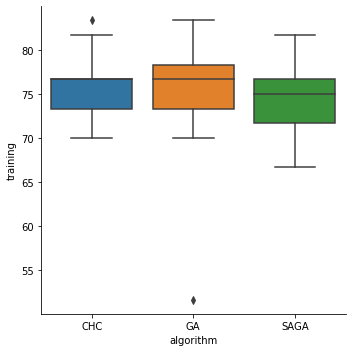

[36, 'CHC', 78.33, 93.33, 5.017971038818359, 84.5]
[36, 'GA', 80.0, 83.33, 5.0056538581848145, 71.0]14 
[36, 'SAGA', 66.67, 85.0, 5.003596067428589, 92.5], Gen =  93 


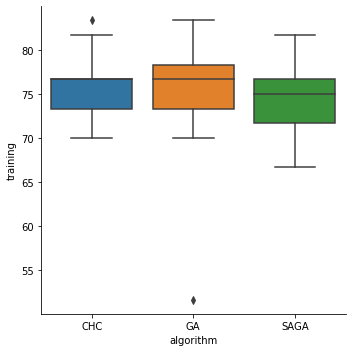

[37, 'CHC', 70.0, 81.67, 5.0021772384643555, 83.0] Gen =  14  66 
[37, 'GA', 75.0, 86.67, 5.118831157684326, 71.5]
[37, 'SAGA', 78.33, 78.33, 5.017610788345337, 93.5]n =  10  4 , Gen =  21  19.07 , Gen =  66  


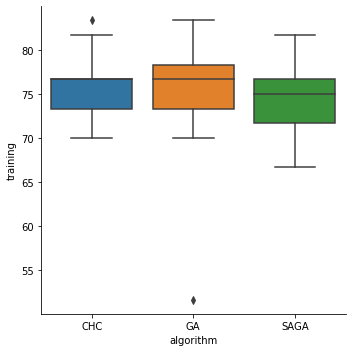

[38, 'CHC', 80.0, 80.0, 5.029099464416504, 78.0] , Gen =  45  , Gen =  64 
[38, 'GA', 78.33, 86.67, 5.141248941421509, 72.5]Gen =  9 
[38, 'SAGA', 81.67, 70.0, 5.00408148765564, 93.5] 19  


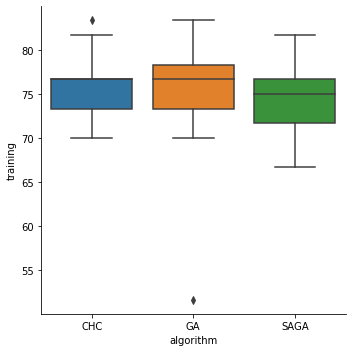

[39, 'CHC', 78.33, 76.67, 5.033612251281738, 83.0]21  60 
[39, 'GA', 80.0, 86.67, 5.100355625152588, 68.5]
[39, 'SAGA', 76.67, 83.33, 5.011844873428345, 92.0]en =  3 64 


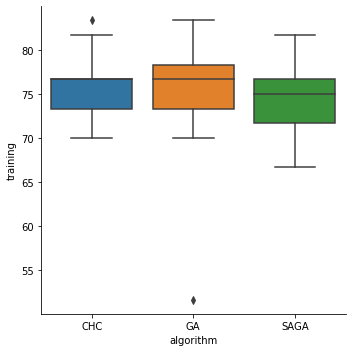

[40, 'CHC', 68.33, 81.67, 5.003408193588257, 80.0]
[40, 'GA', 55.0, 50.0, 5.141238689422607, 67.5] , Gen =  15   
[40, 'SAGA', 75.0, 86.67, 5.011718273162842, 94.5]  -152.64 , Gen =  1 111 


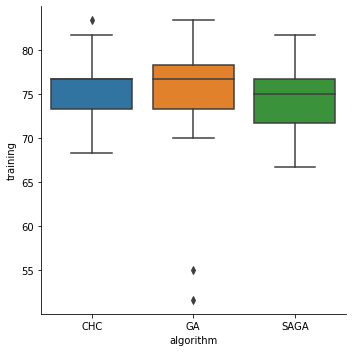

[41, 'CHC', 75.0, 81.67, 5.020612955093384, 83.0] , Gen =  71  -80.2 , Gen =  77 
[41, 'GA', 75.0, 80.0, 5.030977010726929, 65.0]  20 
[41, 'SAGA', 73.33, 86.67, 5.0336480140686035, 91.0]33  , Gen =  61 


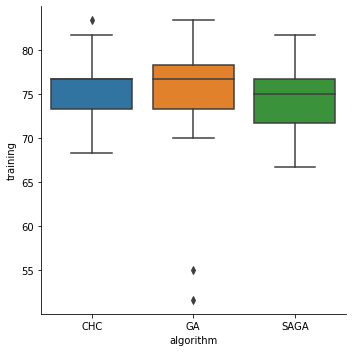

[42, 'CHC', 78.33, 70.0, 5.011590003967285, 82.5]=  110 
[42, 'GA', 78.33, 81.67, 5.188013792037964, 62.5]
[42, 'SAGA', 71.67, 81.67, 5.006954193115234, 94.5]


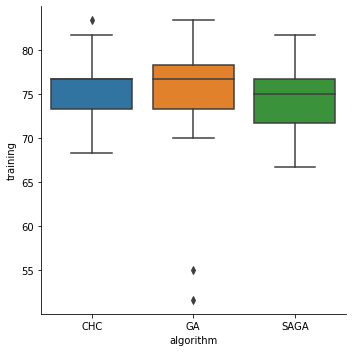

[43, 'CHC', 73.33, 70.0, 5.011450290679932, 82.5]
[43, 'GA', 76.67, 78.33, 5.042619466781616, 71.5] 
[43, 'SAGA', 71.67, 75.0, 5.017045736312866, 91.5]Gen =  15 


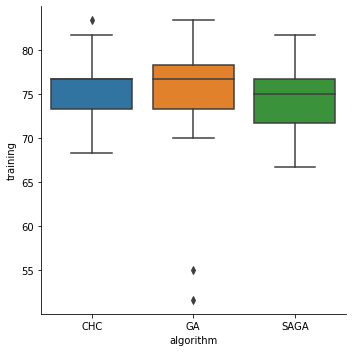

[44, 'CHC', 85.0, 78.33, 5.023270845413208, 80.5]  , Gen =  6 56 
[44, 'GA', 76.67, 81.67, 5.1276938915252686, 70.0]
[44, 'SAGA', 73.33, 73.33, 5.005328178405762, 87.0]Gen =  79 


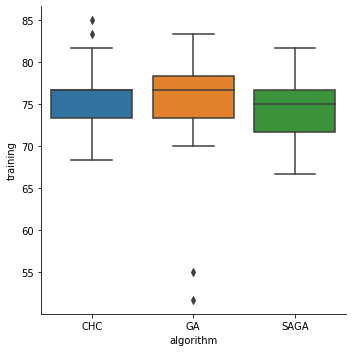

[45, 'CHC', 71.67, 78.33, 5.012967824935913, 78.5]9  88 
[45, 'GA', 80.0, 76.67, 5.151245594024658, 73.0]  12  15 
[45, 'SAGA', 81.67, 86.67, 5.004904508590698, 93.5]Gen =  1  22.75 , Gen =  78 


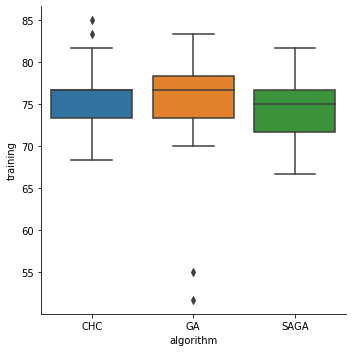

[46, 'CHC', 71.67, 70.0, 5.000406742095947, 80.0]
[46, 'GA', 80.0, 76.67, 5.055361270904541, 70.0]9  , Gen =  10 
[46, 'SAGA', 73.33, 86.67, 5.002092599868774, 93.5]Gen =  2 


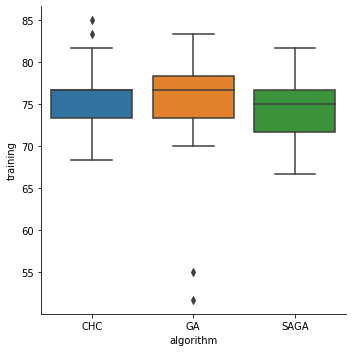

[47, 'CHC', 78.33, 81.67, 5.030307292938232, 81.5]2 
[47, 'GA', 76.67, 81.67, 5.030287027359009, 73.5]4 , Gen =  6 , Gen =  10  , Gen =  18 19 
[47, 'SAGA', 73.33, 85.0, 5.011199235916138, 90.5]


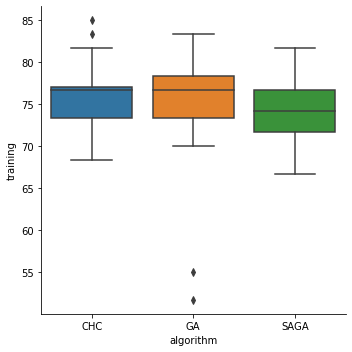

[48, 'CHC', 75.0, 88.33, 5.01079535484314, 78.5]
[48, 'GA', 53.33, 53.33, 5.194450616836548, 65.5]Gen =  6  -305.15 , Gen =  11 -296.63 , Gen =  14  -289.0 , Gen =  20 
[48, 'SAGA', 75.0, 71.67, 5.016989707946777, 89.5] 11 


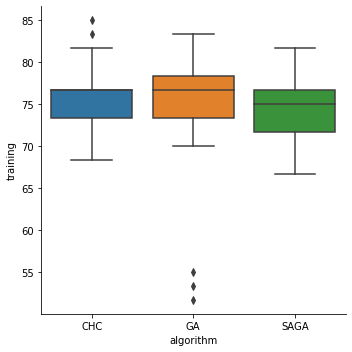

[49, 'CHC', 73.33, 83.33, 5.020086288452148, 83.0]1  -89.79 , Gen =  36  -77.15 , Gen =  47  -58.6 , Gen =  51  -58.6 , Gen =  54 
[49, 'GA', 73.33, 80.0, 5.090906858444214, 77.0]
[49, 'SAGA', 71.67, 75.0, 5.000778913497925, 92.5], Gen =  1  , Gen =  4  96 


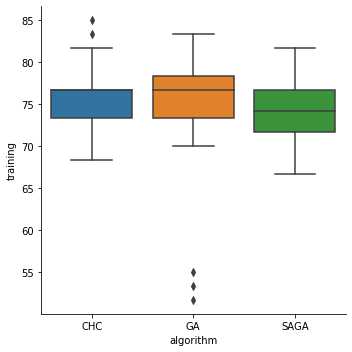

In [49]:
exp_dir = 'C:/Users/mohalt/Desktop/Halmstad/EVE/GA/Experiments PSO/'
experiment_counter = 0
timeout = 5
alpha = 1
target_dataset = 'validation'

for i in range(50):
    log, population = EvolutionaryWrapperFeatureSelection.CHC(dataset, 
                                                          populationSize=40, 
                                                          d=False, 
                                                          divergence=0.35, 
                                                          timeout=timeout)

    
     
    feature_individual = log.iloc[-1]['best_solution']  
    elapsed_time = log.iloc[-1]['time']
    training = np.round(100*EvolutionaryWrapperFeatureSelection.evaluate(feature_individual, 'feature_selection', target_dataset, baseline_individual, alpha)[0], 2)
    testing = np.round(100*EvolutionaryWrapperFeatureSelection.evaluate(feature_individual, 'feature_selection', 'test', baseline_individual, alpha)[0], 2)
    row = [experiment_counter, 'CHC', training, testing, elapsed_time, 100-100*np.sum(feature_individual)/len(feature_individual)]
    comparision_df.loc[len(comparision_df)] = row
    print(row)
    

    log, population = EvolutionaryWrapperFeatureSelection.GA(dataset, 
                                                         populationSize=40, 
                                                         crossOverP=0.9, 
                                                         mutationP=0.1, 
                                                         timeout=timeout)

    feature_individual = log.iloc[-1]['best_solution']  
    elapsed_time = log.iloc[-1]['time']
    training = np.round(100*EvolutionaryWrapperFeatureSelection.evaluate(feature_individual, 'feature_selection', target_dataset, baseline_individual, alpha)[0], 2)
    testing = np.round(100*EvolutionaryWrapperFeatureSelection.evaluate(feature_individual, 'feature_selection', 'test', baseline_individual, alpha)[0], 2)
    row = [experiment_counter, 'GA', training, testing, elapsed_time, 100-100*np.sum(feature_individual)/len(feature_individual)]
    comparision_df.loc[len(comparision_df)] = row
    print(row)
    
    log, population = SurrogateAssistedWrapperFeatureSelection.SAGA(dataset, 
                                                                populationSize=40, 
                                                                a=16, 
                                                                reductionRate=0.5, 
                                                                step=10, 
                                                                verbose=0,
                                                                evaluation='validation',
                                                                timeout=timeout)

    
    feature_individual = log.iloc[-1]['best_solution']  
    elapsed_time = log.iloc[-1]['time']
    training = np.round(100*EvolutionaryWrapperFeatureSelection.evaluate(feature_individual, 'feature_selection', target_dataset, baseline_individual, alpha)[0], 2)
    testing = np.round(100*EvolutionaryWrapperFeatureSelection.evaluate(feature_individual, 'feature_selection', 'test', baseline_individual, alpha)[0], 2)
    row = [experiment_counter, 'SAGA', training, testing, elapsed_time, 100-100*np.sum(feature_individual)/len(feature_individual)]
    comparision_df.loc[len(comparision_df)] = row
    print(row)
  
   
    
   
    
    
    experiment_counter +=1
    sns_plot= sns.catplot(x='algorithm', y='training', kind="box", data=comparision_df)
    #sns_plot= sns.catplot(x='algorithm', y='testing', kind="box", data=comparision_df)
    #sns_plot= sns.catplot(x='algorithm', y='reduction', kind="box", data=comparision_df)

    plt.show()
    
    
    
    


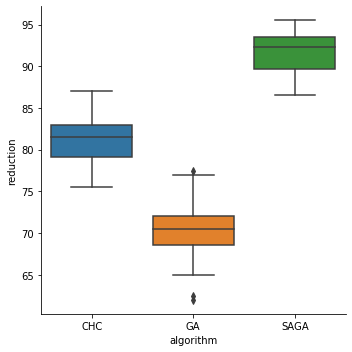

In [51]:
sns_plot= sns.catplot(x='algorithm', y='reduction', kind="box", data=comparision_df)


In [68]:
log

,generation,time,best_fitness,average_fitness,number_of_evaluations,best_solution,best_fitness_original
0,10,4.327156,-242.40,NA,1,"[1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, ...",-242.40
1,20,5.738389,-204.42,NA,2,"[1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, ...",-204.42
2,30,6.819490,-146.99,NA,3,"[1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, ...",-146.99
0,31,10.809814,-142.59,-2.1647,81,"[1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, ...",-142.59
